In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
#import matplotlib.scale as scale

### Covid

In [4]:
covid_lstm_PICP = np.load("../../output/exp_covid/lstm/lstm_d32_p0.5/1/inference_results/PICP_per_timestep.npy")
covid_smc_PICP = np.load("../../output/exp_covid/smc_t/smc_t_d32_p10/1/inference_results/PICP_per_timestep.npy")
covid_transf_PICP = np.load("../../output/exp_covid/baseline_t/baseline_t_d32_p0.5/1/inference_results/PICP_per_timestep.npy")
covid_bayes_PICP = np.load("../../output/exp_covid/covid_bayes/inference_results/PICP_per_timestep.npy")

In [5]:
covid_smc_PICP.shape

(20,)

### Weather

In [6]:
weather_transf_PICP = np.load("../../output/exp_weather/baseline_t/baseline_t_d32_p0.5/1/inference_results/PICP_per_timestep_mean.npy")
weather_lstm_PICP = np.load("../../output/exp_weather/lstm/lstm_d32_p0.5/1/inference_results/PICP_per_timestep_mean.npy")
weather_smc_PICP = np.load("../../output/exp_weather/smc_t_d32_p10/1/inference_results/PICP_per_timestep_mean.npy")
weather_bayes_PICP = np.load("../../output/exp_weather/bayesian_lstm_d32/1/inference_results/PICP_per_timestep_mean.npy")

### air quality

In [7]:
aq_transf_PICP = np.load('../../output/exp_airquality/baseline_t_d32_p0.5/1/inference_results/PICP_per_timestep_mean.npy')
aq_lstm_PICP = np.load('../../output/exp_airquality/lstm_d32_p0.5/1/inference_results/PICP_per_timestep_mean.npy')
aq_smc_PICP = np.load("../../output/exp_airquality/smc_T_d32_10p/1/inference_results/PICP_per_timestep_mean.npy")
aq_bayes_PICP = np.load("../../output/exp_airquality/bayesian_lstm_d32/1/inference_results/PICP_per_timestep_mean.npy")

### energy

In [8]:
energy_transf_PICP = np.load("../../output/exp_energy/baseline_t_d32_p0.5/1/inference_results/PICP_per_timestep_mean.npy")
energy_lstm_PICP = np.load("../../output/exp_energy/lstm_d32_p0.1/1/inference_results/PICP_per_timestep_mean.npy")
energy_smc_PICP = np.load("../../output/exp_energy/smc_t_d32_p10/1/inference_results/PICP_per_timestep_mean.npy")
energy_bayes_PICP = np.load("../../output/exp_energy/bayesian_lstm_d32/1/inference_results/PICP_per_timestep_mean.npy")

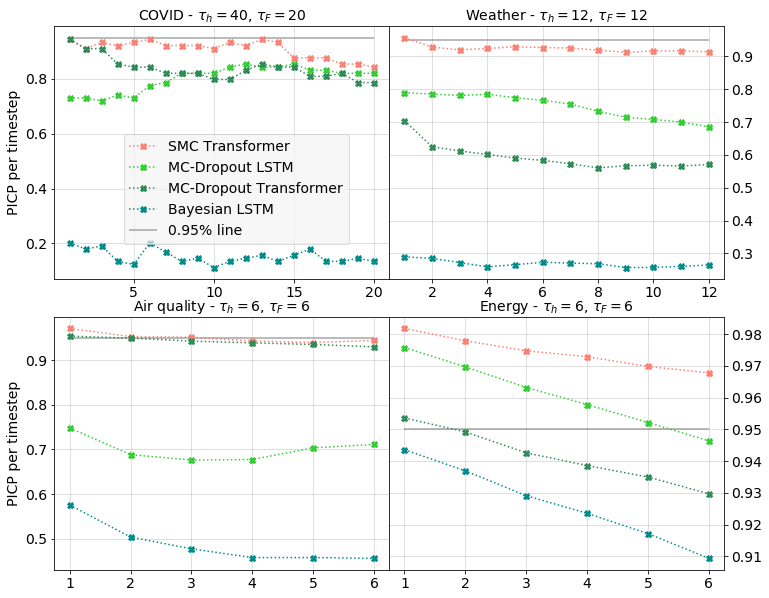

In [9]:
colors = ['salmon', 'limegreen', 'seagreen', 'darkcyan']
#fig, axs = plt.subplots(2,2,figsize=(15, 7))
fig, axs = plt.subplots(2, 2, figsize=(12, 10),
                        gridspec_kw={'hspace': 0.15, 'wspace': 0})
(ax1, ax2), (ax3, ax4) = axs
x = np.linspace(1,20,20)
x_w = np.linspace(1,12,12)
x_6 = np.linspace(1,6,6)
ax1.plot(x, covid_smc_PICP, label='SMC Transformer', color=colors[0], marker='X', linestyle='dotted')
ax1.plot(x, covid_lstm_PICP, color=colors[1], label='MC-Dropout LSTM', marker='X', linestyle='dotted')
ax1.plot(x, covid_transf_PICP, color=colors[2], label='MC-Dropout Transformer', marker='X', linestyle='dotted')
ax1.plot(x, covid_bayes_PICP, color=colors[3], label='Bayesian LSTM', marker='X', linestyle='dotted')
ax2.plot(x_w, weather_smc_PICP, label='Weather - SMC Transformer', linestyle='dotted', color=colors[0], marker='X')
ax2.plot(x_w, weather_lstm_PICP, color=colors[1], label='Weather - MC-Dropout Lstm', linestyle='dotted', marker='X')
ax2.plot(x_w, weather_transf_PICP, color=colors[2], label='Weather - MC-Dropout Transformer', linestyle='dotted', marker='X')
ax2.plot(x_w, weather_bayes_PICP, color=colors[3], label='Weather - Bayesian LSTM', linestyle='dotted', marker='X')
ax3.plot(x_6, aq_smc_PICP, label='Air quality - SMC Transformer', marker='X', color=colors[0], linestyle='dotted')
ax3.plot(x_6, aq_lstm_PICP, color=colors[1], label='Air quality - MC-Dropout Lstm', marker='X', linestyle='dotted')
ax3.plot(x_6, aq_transf_PICP, color=colors[2], label='Air quality - MC-Dropout Transformer', marker='X', linestyle='dotted')
ax3.plot(x_6, aq_bayes_PICP, color=colors[3], label='Air quality - Bayesian LSTM', marker='X', linestyle='dotted')
ax4.plot(x_6, energy_smc_PICP, label='Energy - SMC Transformer', marker='X', color=colors[0], linestyle='dotted')
ax4.plot(x_6, energy_lstm_PICP, color=colors[1], label='Energy - MC-Dropout Lstm', marker='X', linestyle='dotted')
ax4.plot(x_6, energy_transf_PICP, color=colors[2], label='Energy - MC-Dropout Transformer', marker='X', linestyle='dotted')
ax4.plot(x_6, energy_bayes_PICP, color=colors[3], label='Energy - Bayesian LSTM', marker='X', linestyle='dotted')
ax1.hlines(0.95,1,20,color="grey", label="0.95% line", alpha=0.7)
ax2.hlines(0.95,1,12,color="grey", label="0.95% line", alpha=0.7)
ax3.hlines(0.95,1,6,color="grey", label="0.95% line", alpha=0.7)
ax4.hlines(0.95,1,6,color="grey", label="0.95% line", alpha=0.7)
ax1.set_title(r"COVID - $\tau_h=40$, $\tau_F=20$", fontsize=14)
ax2.set_title(r"Weather - $\tau_h=12$, $\tau_F=12$", fontsize=14)
ax3.set_title(r"Air quality - $\tau_h=6$, $\tau_F=6$", fontsize=14)
ax4.set_title(r"Energy - $\tau_h=6$, $\tau_F=6$", fontsize=14)
ax1.set_ylabel('PICP per timestep', fontsize=14)
ax3.set_ylabel('PICP per timestep', fontsize=14)
ax1.grid('on', alpha=0.5)
ax2.grid('on', alpha=0.5)
ax3.grid('on', alpha=0.5)
ax4.grid('on', alpha=0.5)
ax2.yaxis.tick_right()
ax4.yaxis.tick_right()
ax1.tick_params(labelsize=14)
ax3.tick_params(labelsize=14)
ax2.tick_params(labelsize=14)
ax4.tick_params(labelsize=14)
ax1.legend(markerscale=1, fontsize=14, loc='upper right', bbox_to_anchor=(0.9,0.6), 
           facecolor='whitesmoke', framealpha=0.7)
#plt.show()
plt.savefig(os.path.join("../../output/plots", "PICP_per_timestep_4datasets.pdf"), bbox_inches="tight")


In [15]:
def plot_PICP_multistep_unistep():
    weather_smc = [0.99, 0.92]
    weather_lstm = [0.78, 0.75]
    weather_transf = [0.89, 0.59]
    weather_bayes = [0.25, 0.27]
    stock_smc = [0.99, 0.98]
    stock_transf = [0.95, 0.83]
    stock_lstm = [0.97, 0.87]
    stock_bayes = [0.85, 0.34]
    aq_smc = [0.97, 0.97]
    aq_bayes = [0.77, 0.49]
    aq_transf = [0.96, 0.77]
    aq_lstm = [0.86, 0.70]
    energy_transf = [0.97, 0.94]
    energy_lstm = [0.99, 0.96]
    energy_bayes = [0.91, 0.93]
    energy_smc = [0.99, 0.97]
    covid_smc = [0.997, 0.91]
    covid_lstm = [0.88, 0.80]
    covid_transf = [0.97, 0.84]
    covid_bayes = [0.27, 0.15]
    fig, ax = plt.subplots(figsize=(7, 7))
    colors = ['salmon', 'limegreen', 'seagreen', 'steelblue']
    x = [1,2,3,4,5]
    shift=0.1
    marker_size = 100
    ax.scatter(3,weather_smc[0], marker='o', color=colors[0], label='SMC Transformer', s=marker_size, alpha=0.7)
    ax.scatter(3,weather_smc[1], marker='x', color=colors[0], s=marker_size)
    ax.scatter(3+shift,weather_lstm[0], marker='o', color=colors[1], label='MC Dropout LSTM', s=marker_size, alpha=0.7)
    ax.scatter(3+shift,weather_lstm[1], marker='x', color=colors[1], s=marker_size) 
    ax.scatter(3+2*shift,weather_transf[0], marker='o', color=colors[2], label='MC Dropout Transformer', s=marker_size, alpha=0.7)
    ax.scatter(3+2*shift,weather_transf[1], marker='x', color=colors[2], s=marker_size)
    ax.scatter(3+3*shift,weather_bayes[0], marker='o', color=colors[3], label='Bayesian LSTM', s=marker_size, alpha=0.7)
    ax.scatter(3+3*shift,weather_bayes[1], marker='x', color=colors[3], s=marker_size)
    
    ax.scatter(5,stock_smc[0], marker='o', color=colors[0], s=marker_size)
    ax.scatter(5,stock_smc[1], marker='x', color=colors[0], s=marker_size)
    ax.scatter(5+shift,stock_lstm[0], marker='o', color=colors[1], s=marker_size)
    ax.scatter(5+shift,stock_lstm[1], marker='x', color=colors[1], s=marker_size) 
    ax.scatter(5+2*shift,stock_transf[0], marker='o', color=colors[2], s=marker_size)
    ax.scatter(5+2*shift,stock_transf[1], marker='x', color=colors[2], s=marker_size)
    ax.scatter(5+3*shift,stock_bayes[0], marker='o', color=colors[3], s=marker_size)
    ax.scatter(5+ 3*shift,stock_bayes[1], marker='x', color=colors[3], s=marker_size)
    
    ax.scatter(2,aq_smc[0], marker='o', color=colors[0], s=marker_size)
    ax.scatter(2,aq_smc[1], marker='x', color=colors[0], s=marker_size)
    ax.scatter(2 + shift,aq_lstm[0], marker='o', color=colors[1], s=marker_size)
    ax.scatter(2 + shift,aq_lstm[1], marker='x', color=colors[1], s=marker_size) 
    ax.scatter(2 + 2*shift, aq_transf[0], marker='o', color=colors[2], s=marker_size)
    ax.scatter(2 + 2* shift,aq_transf[1], marker='x', color=colors[2], s=marker_size)
    ax.scatter(2 + 3*shift,aq_bayes[0], marker='o', color=colors[3], s=marker_size)
    ax.scatter(2+ 3*shift,aq_bayes[1], marker='x', color=colors[3], s=marker_size)
    
    ax.scatter(4,energy_smc[0], marker='o', color=colors[0], s=marker_size, alpha=0.7)
    ax.scatter(4,energy_smc[1], marker='x', color=colors[0], s=marker_size)
    ax.scatter(4+ shift,energy_lstm[0], marker='o', color=colors[1], s=marker_size, alpha=0.7)
    ax.scatter(4+shift,energy_lstm[1], marker='x', color=colors[1], s=marker_size) 
    ax.scatter(4+2*shift ,energy_transf[0], marker='o', color=colors[2], s=marker_size, alpha=0.7)
    ax.scatter(4+2*shift,energy_transf[1], marker='x', color=colors[2], s=marker_size)
    ax.scatter(4+3*shift ,energy_bayes[0], marker='o', color=colors[3], s=marker_size, alpha=0.7)
    ax.scatter(4+3*shift,energy_bayes[1], marker='x', color=colors[3], s=marker_size)
    
    ax.scatter(1,covid_smc[0], marker='o', color=colors[0], s=marker_size)
    ax.scatter(1, covid_smc[1], marker='x', color=colors[0], s=marker_size)
    ax.scatter(1+ shift,covid_lstm[0], marker='o', color=colors[1], s=marker_size)
    ax.scatter(1+shift,covid_lstm[1], marker='x', color=colors[1], s=marker_size) 
    ax.scatter(1+2*shift ,covid_transf[0], marker='o', color=colors[2], s=marker_size)
    ax.scatter(1+2*shift,covid_transf[1], marker='x', color=colors[2], s=marker_size)
    ax.scatter(1+3*shift ,covid_bayes[0], marker='o', color=colors[3], s=marker_size)
    ax.scatter(1+3*shift,covid_bayes[1], marker='x', color=colors[3], s=marker_size)
    
    ax.hlines(0.95,1,5,color="grey", label="0.95% line", alpha=0.7)
    
    ax.set_xticks([1,2,3,4,5])
    ax.set_xticklabels(['covid', 'air quality', 'weather', 'energy', 'stock'])
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14, labelright=True)
    
    # Function x**2
    def forward(x):
        return x**2


    def inverse(x):
        return x**(1/2)
    #scale.FuncScale(axis=1, functions=(forward,inverse))
    #ax.set_yscale('functions', functions=(forward, inverse))
    #ax.set_yscale('linear')
    #ax.set_ylim(ymin=0.1, ymax=1.5)
    #ax.set_title('function: $x^{1/2}$')
    #ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 1, 0.2)**(1/2)))
    #ax.yaxis.set_major_locator(FixedLocator(np.arange(0, 1, 0.2)))
    
    ax.grid('on', alpha=0.5)
    ax.legend(fontsize=14,facecolor='whitesmoke', framealpha=0.4) #frameon=False
    plt.show()

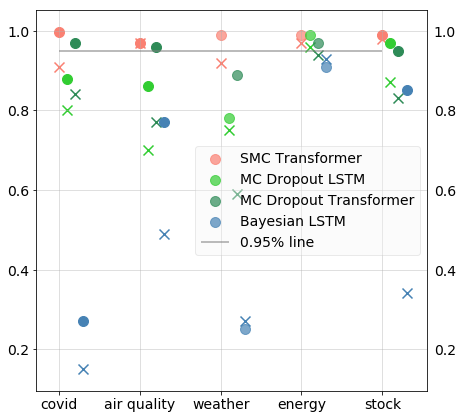

In [16]:
plot_PICP_multistep_unistep()

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_yscale()

### weather examples

In [ ]:
smc_distrib = np.load("../../output/exp_weather/smc_t_d32_p10/1/inference_results/distrib_multistep.npy")
lstm_distrib = np.load("../../output/exp_weather_lstm/lstm_d32_p0.5/1/inference_results/distrib_multistep.npy")
smc_distrib_unistep = np.load("../../output/exp_weather/smc_t_d32_p10/1/inference_results/distrib_unistep.npy")
lstm_distrib_unistep = np.load("../../output/exp_weather_lstm/lstm_d32_p0.5/1/inference_results/distrib_unistep.npy")


In [ ]:
smc_distrib.shape

In [ ]:
lstm_distrib.shape

In [ ]:
true_data = np.load("../../data/weather_vm3/test/weather.npy")
true_data = true_data[:3000,:-1, 1]
true_data_12 = true_data[:,12:]

In [ ]:
true_data_12.shape

In [ ]:
smc_distrib_T = np.squeeze(smc_distrib[:,:,:,1])
lstm_distrib_T = np.squeeze(lstm_distrib[:,:,:,1])
smc_distrib_T_uni = np.squeeze(smc_distrib_unistep[:,:,:,1])
lstm_distrib_T_uni = np.squeeze(lstm_distrib_unistep[:,:,:,1])

In [ ]:
print(smc_distrib_T_uni.shape)
print(lstm_distrib_T_uni.shape)

In [ ]:
distribs = [smc_distrib_T, lstm_distrib_T]
distribs_uni = [smc_distrib_T_uni, lstm_distrib_T_uni]

In [ ]:
def compute_predictive_interval(predictive_distribution, index, std_multiplier=1.96):
    mean_distrib = np.mean(predictive_distribution, axis=1) # shape (B,S)
    std_distrib = np.std(predictive_distribution, axis=1)
    lower_bounds = mean_distrib - std_multiplier * std_distrib  # shape(B,S)
    upper_bounds = mean_distrib + std_multiplier * std_distrib
    mean = mean_distrib[index]
    lower_bound = lower_bounds[index]
    upper_bound = upper_bounds[index]
    return mean, lower_bound, upper_bound

In [ ]:
colors = ['salmon', 'limegreen']
def plot_forecast_with_bounds(distribs, true_data, index):
    fig, ax = plt.subplots(figsize=(6,6))
    x = np.linspace(1,distribs[0].shape[2],distribs[0].shape[2])
    #index = np.random.randint(distribs[0].shape[0])
    print(index)
    ground_truth = true_data[index]
    ax.plot(x, ground_truth, color='grey')
    for i, distrib in enumerate(distribs):
        mean, lower_bound, upper_bound = compute_predictive_interval(distrib, index)
        ax.plot(x, mean, color=colors[i], lw=2, label='SMC-T')
        ax.fill_between(x, lower_bound, upper_bound, alpha=0.3, facecolor=colors[i], edgecolor=colors[i])
    ax.grid('on', alpha=0.5)
    plt.show()
    plt.close()

In [ ]:
for _ in range(5):
    index = np.random.randint(distribs_uni[0].shape[0])
    plot_forecast_with_bounds(distribs_uni, true_data, index)

In [ ]:
for _ in range(8):
    index = np.random.randint(distribs[0].shape[0])
    plot_forecast_with_bounds(distribs, true_data_12, index)